Machine Learning CA1 - Abalone Dataset     Alicia Romero     Student ID: Sba25232

TASK 1: Cleaning and EDA phase

In [1]:
# Import Libraries and Load Data 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', 
# Machine Learning module, CCT College Dublin.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the abalone dataset
data = pd.read_csv('abalone.csv')

# Displaying the first 10 rows
print(data.head(10))

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3       

In [2]:
# Checking the shape
print(data.shape)


(4180, 9)


In [3]:
# Check for Missing Values and Duplicates 
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print("Missing values:")
print(data.isnull().sum())


Missing values:
Sex               0
Length            0
Diameter          0
Height            8
Whole_weight      0
Shucked_weight    5
Viscera_weight    5
Shell_weight      0
Rings             0
dtype: int64


In [4]:
#I'll drop the null values and check
data = data.dropna()
print(data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [5]:
#I'll check the duplicates now and drop them
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 3


In [6]:
data = data.drop_duplicates()
print(data.shape)

(4161, 9)


In [7]:
#and check again that it's been done
print(data.shape)


(4161, 9)


In [8]:
# --- STEP 4: Exploratory Data Analysis - Summary Statistics ---
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print(data.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4161.000000  4161.000000  4161.000000   4161.000000     4161.000000   
mean      0.524166     0.407987     0.139561      0.829149        0.359599   
std       0.120046     0.099213     0.041834      0.489786        0.221785   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.442500        0.186500   
50%       0.545000     0.425000     0.140000      0.800500        0.336000   
75%       0.615000     0.480000     0.165000      1.154000        0.503000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4161.000000   4161.000000  4161.000000  
mean         0.180719      0.238941     9.931267  
std          0.109580      0.139051     3.223872  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [9]:
# STEP 5: Check Data Types
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'
# Machine Learning module, CCT College Dublin.

print(data.dtypes)

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object


In [10]:
# --- STEP 6: Check Class Balance  or distribution for Sex (Target Variable) ---
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb'

print(data['Sex'].value_counts())

Sex
M    1523
I    1338
F    1300
Name: count, dtype: int64


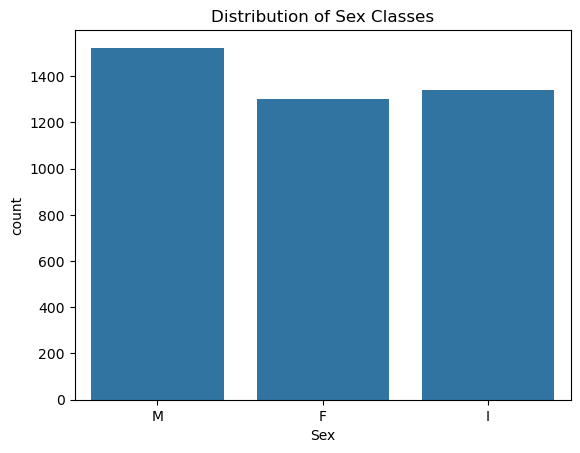

In [11]:
# --- Visualize Sex Distribution ---
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', Class2

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sex', data=data)
plt.title('Distribution of Sex Classes')
plt.show()

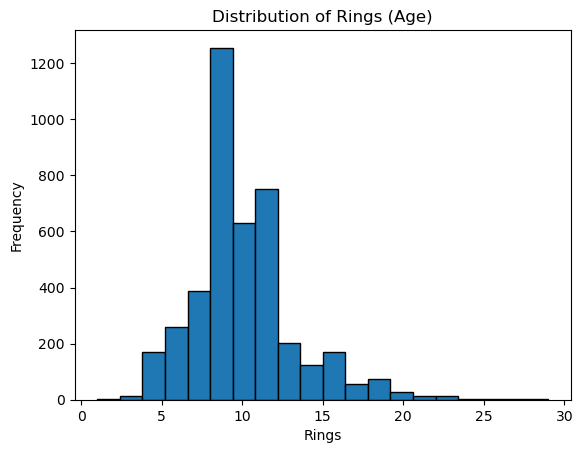

In [12]:
# --- Visualize Rings Distribution ---
# Code adapted from Iqbal, M. (2026) 'Class_Demo_DT.ipynb', Class 2

plt.hist(data['Rings'], bins=20, edgecolor='black')
plt.title('Distribution of Rings (Age)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

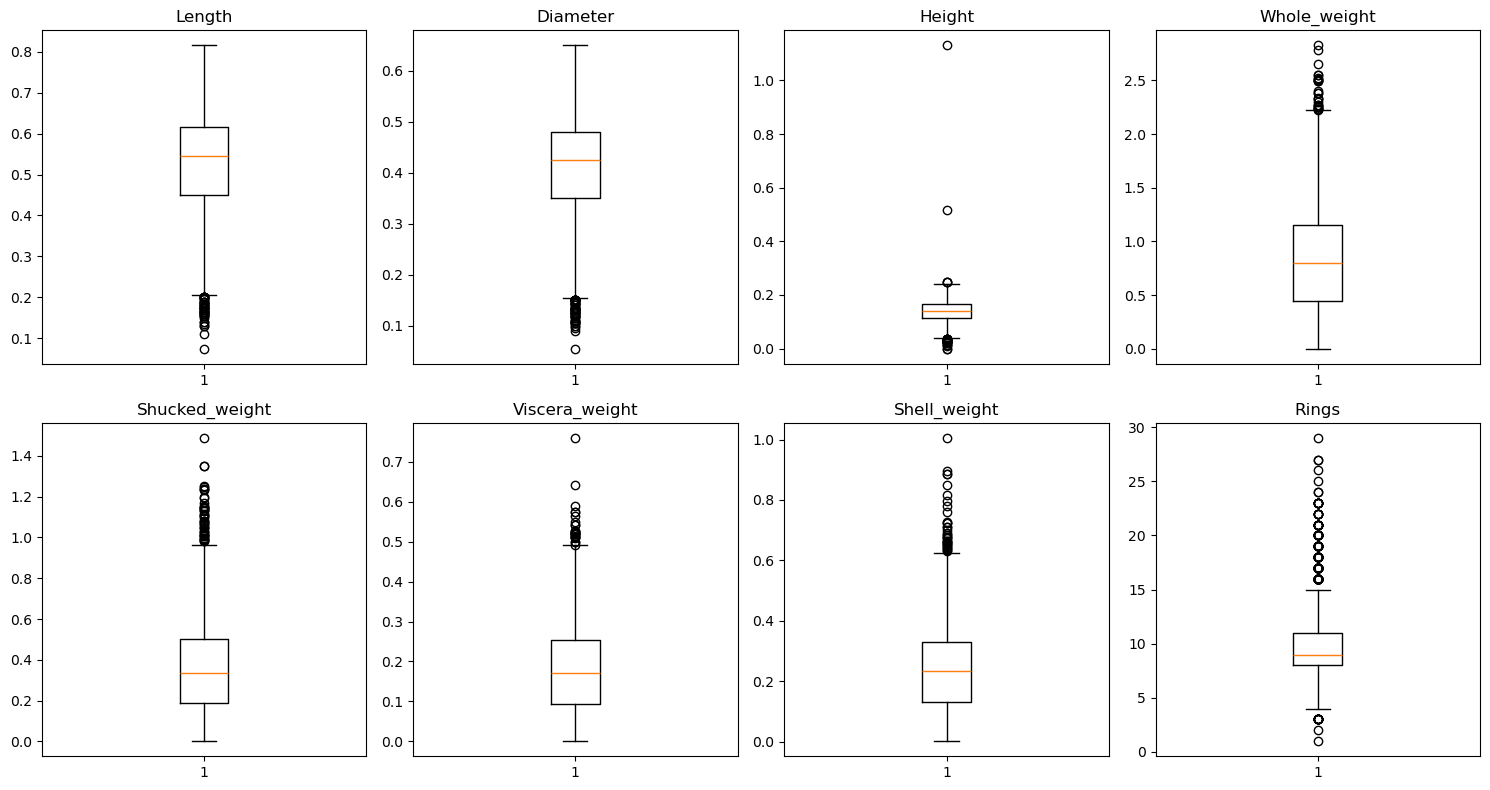

In [13]:
#I want to check for possible outliers and will do so by visualizing each variable with boxplots
#Code adapted from 'Data Preparation'(2025), CCT College Module 

plt.figure(figsize=(15, 8))

plt.subplot(2, 4, 1)
plt.boxplot(data['Length'])
plt.title('Length')

plt.subplot(2, 4, 2)
plt.boxplot(data['Diameter'])
plt.title('Diameter')

plt.subplot(2, 4, 3)
plt.boxplot(data['Height'])
plt.title('Height')

plt.subplot(2, 4, 4)
plt.boxplot(data['Whole_weight'])
plt.title('Whole_weight')

plt.subplot(2, 4, 5)
plt.boxplot(data['Shucked_weight'])
plt.title('Shucked_weight')

plt.subplot(2, 4, 6)
plt.boxplot(data['Viscera_weight'])
plt.title('Viscera_weight')

plt.subplot(2, 4, 7)
plt.boxplot(data['Shell_weight'])
plt.title('Shell_weight')

plt.subplot(2, 4, 8)
plt.boxplot(data['Rings'])
plt.title('Rings')

plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

In [14]:
#And, as I see some outliers, I will proceed to remove the upper and lower extremes
#Code adapted from 'Data Preparation'(2025), CCT College Module 
# Cap at 1st and 99th percentile

lower = data['Length'].quantile(0.01)
data['Length'] = data['Length'].clip(lower, )

In [15]:
lower = data['Diameter'].quantile(0.01)
data['Diameter'] = data['Diameter'].clip(lower, )

In [16]:
lower = data['Height'].quantile(0.01)
upper = data['Height'].quantile(0.99)
data['Height'] = data['Height'].clip(lower, upper)

In [17]:

upper = data['Whole_weight'].quantile(0.99)
data['Whole_weight'] = data['Whole_weight'].clip(lower, upper)

In [18]:

upper = data['Shucked_weight'].quantile(0.99)
data['Shucked_weight'] = data['Shucked_weight'].clip(lower, upper)

In [19]:

upper = data['Viscera_weight'].quantile(0.99)
data['Viscera_weight'] = data['Viscera_weight'].clip(lower, upper)

In [20]:

upper = data['Shell_weight'].quantile(0.99)
data['Shell_weight'] = data['Shell_weight'].clip(lower, upper)

In [21]:
lower = data['Rings'].quantile(0.01)
upper = data['Rings'].quantile(0.99)
data['Rings'] = data['Rings'].clip(lower, upper)

In [22]:
# Save cleaned data
data.to_csv('abalone_clean.csv', index=False)

In [23]:
# Load cleaned data
data = pd.read_csv('abalone_clean.csv')

In [24]:
# Make sure the clean data is there
print (data.head(5))

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0450   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [25]:
print(data.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4161.000000  4161.000000  4161.000000   4161.000000     4161.000000   
mean      0.524468     0.408199     0.139302      0.827464        0.359061   
std       0.119154     0.098604     0.037911      0.483547        0.215996   
min       0.195000     0.140000     0.045000      0.045000        0.045000   
25%       0.450000     0.350000     0.115000      0.442500        0.186500   
50%       0.545000     0.425000     0.140000      0.800500        0.336000   
75%       0.615000     0.480000     0.165000      1.154000        0.503000   
max       0.815000     0.650000     0.220000      2.141600        0.993700   

       Viscera_weight  Shell_weight        Rings  
count     4161.000000   4161.000000  4161.000000  
mean         0.182190      0.239283     9.913242  
std          0.105436      0.134412     3.126564  
min          0.045000      0.045000     4.000000  
25%          0.093500      0.130000     8.

TASK 2: Classification

In [26]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
# Encoding the 'Sex' column
#Code adapted from 'Data Preparation'(2025), CCT College Module

le = LabelEncoder()
data['Sex_Encoded'] = le.fit_transform(data['Sex'])

print('Sex encoding:')
print('F =', le.transform(['F'])[0])
print('I =', le.transform(['I'])[0])
print('M =', le.transform(['M'])[0])

Sex encoding:
F = 0
I = 1
M = 2


In [28]:
# Prepare features
# Code adapted from Iqbal, M. (2026) 'DT_Task_Solution.ipynb'
X = data.drop(['Sex','Sex_Encoded'], axis=1)
y = data['Sex_Encoded']

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (4161, 8)
Target shape: (4161,)


In [29]:
# Code adapted from Iqbal, M. (2026) 'DT_Task_Solution.ipynb'
from sklearn.model_selection import train_test_split

# Split the data: 70% training, 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2912, 8)
Testing set size: (1249, 8)


Model 1: Decision Tree

In [30]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create model
dt_model = DecisionTreeClassifier(criterion='gini')
# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_dt)

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.9986263736263736
Test Accuracy: 0.49479583666933546


In [32]:
# Code adapted from Iqbal, M. (2026) 'Comparison_Classification_Models.ipynb'
# Import  and apply cross validation (k-fold)
from sklearn.model_selection import KFold, cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print('Mean Cross Validation accuracy:', cv_scores.mean())

Mean Cross Validation accuracy: 0.49194927971188473


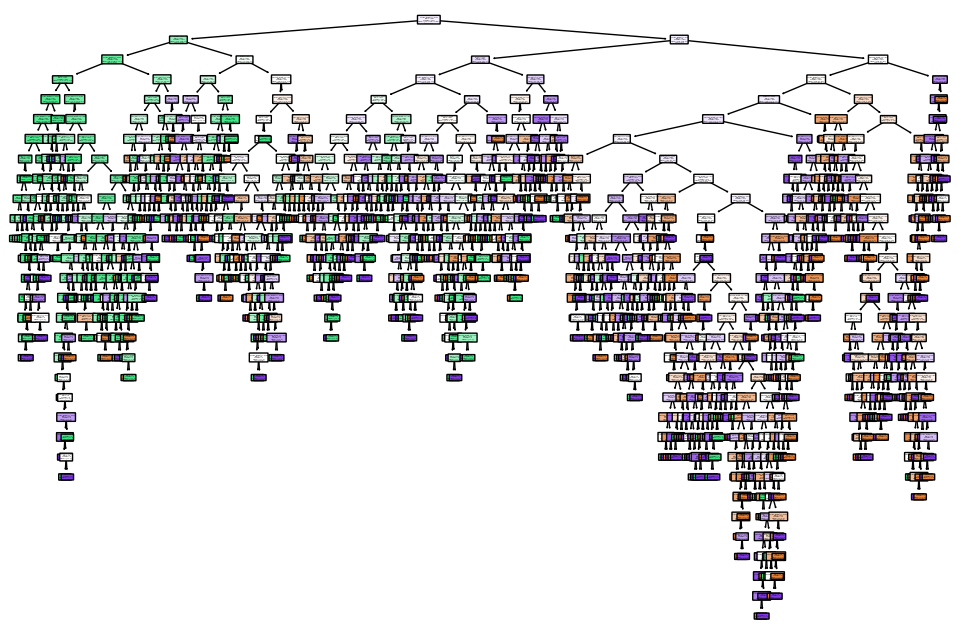

In [33]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Visualize tree
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=['Female', 'Infant', 'Male'], rounded=True)
plt.savefig('decision_tree.png')
plt.show()

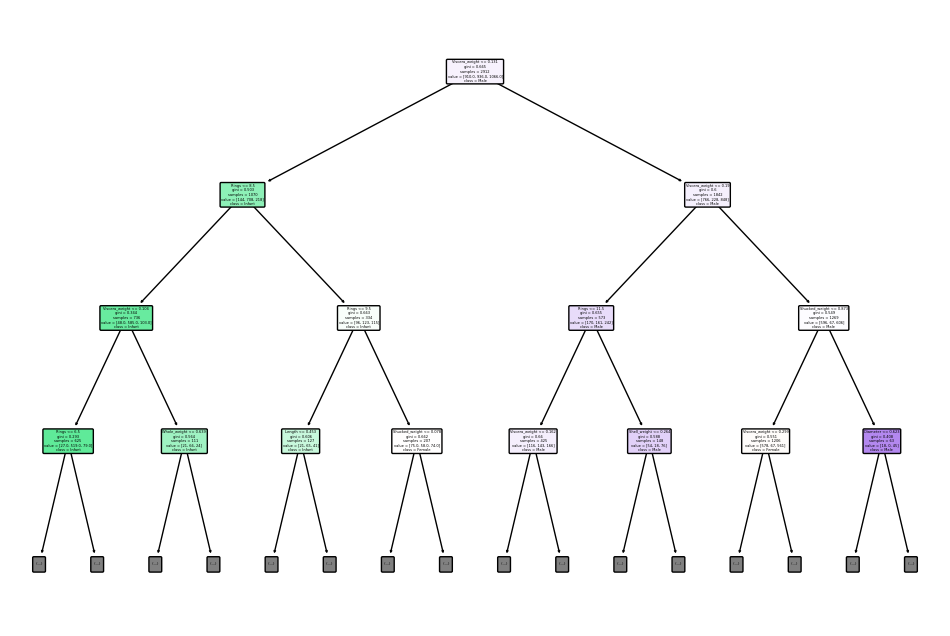

In [34]:
# Visualize a cleaner tree
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(
    dt_model,
    max_depth=3,
    filled=True,
    feature_names=X.columns,
    class_names=['Female', 'Infant', 'Male'],
    rounded=True
)
plt.savefig('decision_tree.png')
plt.show()

In [35]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[166  51 173]
 [ 44 266  92]
 [187  84 186]]


In [36]:
# Code adapted from Iqbal, M. (2026) 'DT_Multi_Class.ipynb'
# Classification report
target_names = ['Female', 'Infant', 'Male']
report = classification_report(y_test, y_pred_dt,target_names=target_names)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Female       0.42      0.43      0.42       390
      Infant       0.66      0.66      0.66       402
        Male       0.41      0.41      0.41       457

    accuracy                           0.49      1249
   macro avg       0.50      0.50      0.50      1249
weighted avg       0.49      0.49      0.49      1249



Model 2: k-NN (nearest neighbours)

In [37]:
# Code adapted from Iqbal, M. (2026) 'Week_3_kNN.ipynb'
# Import kNN
from sklearn.neighbors import KNeighborsClassifier
# Create model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [38]:
# Code adapted from Iqbal, M. (2026) 'Week_3_kNN.ipynb'
# Make predictions
y_pred_knn = knn_model.predict(X_test)


In [40]:
# Code adapted from Iqbal, M. (2026) 'Week_3_kNN.ipynb'
# Calculate accuracy
train_acc_knn = accuracy_score(y_train,knn_model.predict(X_train))
test_acc_knn = accuracy_score(y_test, y_pred_knn)

print('kNN Results:')
print('Training Accuracy:', train_acc_knn)
print('Test Accuracy:', test_acc_knn)

kNN Results:
Training Accuracy: 0.6850961538461539
Test Accuracy: 0.5196156925540433


TASK 3: Regression

In [ ]:
# Load cleaned data
data = pd.read_csv('abalone_clean.csv')